<a href="https://colab.research.google.com/github/rfernandes29/mlusp/blob/main/aula03_02_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão logística

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [ ]:
def logistic(x):
    return 1 / (1+np.exp(-x))

def logistic_model(x, w):
    y_hat = logistic(np.dot(x, w)) # wTx
    return y_hat

def compute_cost(X, y, w, m, eps=1e-5):
    y_hat = logistic(np.dot(X, w)) # wTx
    J = -1/m*(y.T @ np.log(y_hat + eps) + (1-y).T @ np.log(1-y_hat + eps))
    return J


def compute_grad(X, y, w, m):
    y_hat = logistic(np.dot(X, w))
    grad = 1/m*(np.dot(X.T, y_hat - y))
    return grad


def gradient_descent(X, y, w_init, learning_rate, n_iter):
    cost_history = np.zeros((n_iter, 1))

    m = y.shape[0]
    w = np.copy(w_init)
    for i in range(n_iter):
        grad = compute_grad(X, y, w, m)
        w = w - learning_rate * grad
        cost_history[i] = compute_cost(X, y, w, m)

    return w, cost_history

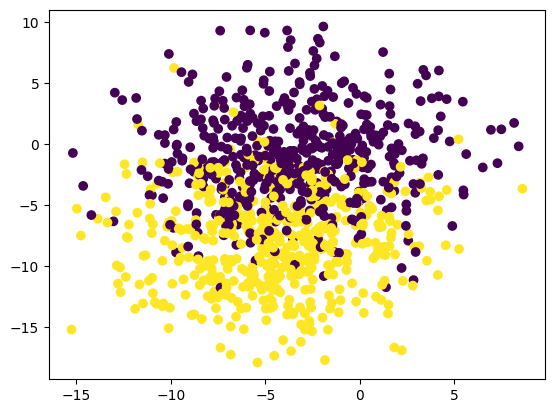

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=4.0, random_state=420)

m = len(y)
X = np.hstack((np.ones((m,1)),X)) # adiciona dimensão extra (bias)
y = y.reshape(-1,1)

plt.scatter(X[:,1], X[:,2], c=y[:,0])

In [ ]:
w = w_init = np.ones((X.shape[1],1))

compute_cost(X, y, w_init, len(y))

array([[2.84777054]])

In [ ]:
compute_grad(X, y, w_init, len(y))

array([[-0.30034442],
       [ 1.00145157],
       [ 2.04164877]])

Text(0, 0.5, 'cost')

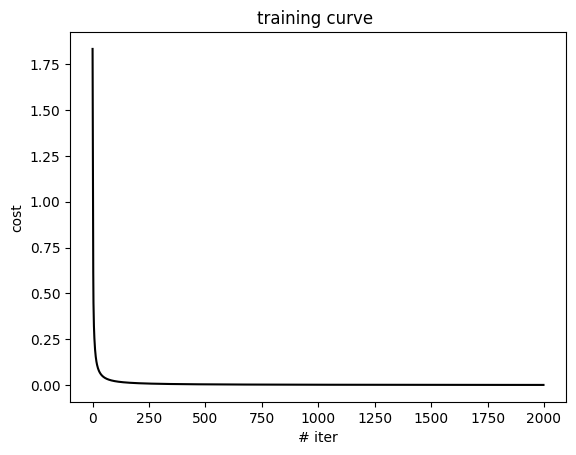

In [ ]:
iterations = 2000
learning_rate = 0.1
w, cost_history = gradient_descent(X, y, w_init, learning_rate, iterations)

# O primeiro valor é grande demais e atrapalha a visualização do gráfico.
cost_history = cost_history[1:]

plt.plot(range(len(cost_history)), cost_history, 'k')
plt.title("training curve ")
plt.xlabel("# iter")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

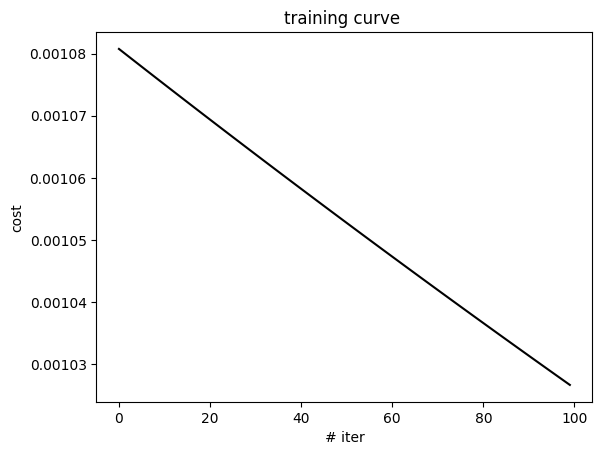

In [ ]:
sub = cost_history[-100:]
plt.plot(range(len(sub)), sub, 'k')
plt.title("training curve ")
plt.xlabel("# iter")
plt.ylabel("cost")

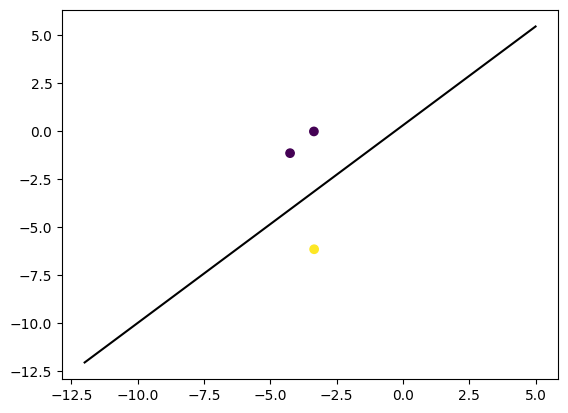

In [ ]:
# Todos os pontos no plano cartesiano que fazem o regressor logístico
# produzir como saída 0.5:
#
# -> w0 + w1x1 + w2x2 = 0
# -> x2 = -(w1/w2)x1 - w0/w2
# Pensando nisso como uma equação linear
# -> y(x)  = -(w1/w2)x - w0/w2 = ax + b

a = -w[1] / w[2] # slope
b = -w[0] / w[2] # intercept

plt.scatter(X[:,1],X[:,2], c=y.reshape(-1));

x_l = np.linspace(-12, 5, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l, c='k');

O primeiro ponto [-4.25529287 -1.13316173] é da classe [0]. De acordo com o modelo a chance da primeira amostra ser positiva é: [0.00126357]
O segundo ponto [-3.35637521e+00 -8.49217678e-04] é da classe [0]. De acordo com o modelo a chance da segunda amostra ser positiva é: [0.00079017]
O terceiro ponto [-3.34754988 -6.14018536] é da classe [1]. De acordo com o modelo a chance da terceira amostra ser positiva é: [0.99894526]


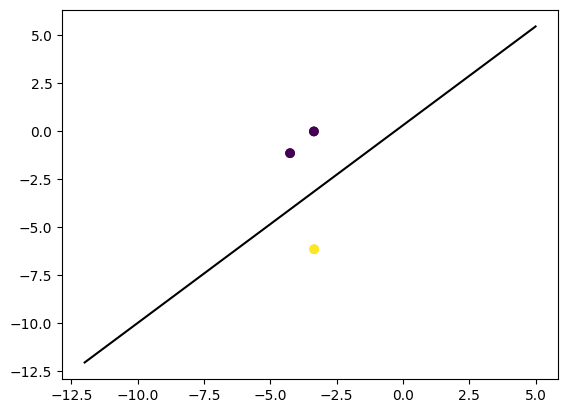

In [ ]:
X, y = make_blobs(n_samples=3, n_features=2, centers=2, cluster_std=1, random_state=420)

m = len(y)
X = np.hstack((np.ones((m,1)),X)) # adiciona dimensão extra (bias)
y = y.reshape(-1,1)

plt.scatter(X[:,1], X[:,2], c=y[:,0])
a = -w[1] / (w[2]+1e-9) # slope
b = -w[0] / (w[2]+1e-9) # intercept

plt.scatter(X[:,1],X[:,2], c=y.reshape(-1));

x_l = np.linspace(-12, 5, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l, c='k');

print(f"O primeiro ponto {X[0, 1:]} é da classe {y[0]}. De acordo com o modelo a chance da primeira amostra ser positiva é: {logistic_model(X[0, :], w)}")
print(f"O segundo ponto {X[1, 1:]} é da classe {y[1]}. De acordo com o modelo a chance da segunda amostra ser positiva é: {logistic_model(X[1, :], w)}")
print(f"O terceiro ponto {X[2, 1:]} é da classe {y[2]}. De acordo com o modelo a chance da terceira amostra ser positiva é: {logistic_model(X[2, :], w)}")